# Exploratory Data Analysis and continuation of Data Wrangling for Second Capstone Project

### Predicting Rain in Australia using data collected over 10 years across 49 locations

In [1]:
#Import python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import datetime


import scipy.stats
from scipy.stats import t
from scipy.stats import chi2_contingency

In [2]:
#load the dataset
file = '/Users/sangeetajayakar/Springboard_Course/Files_for_second_capstone/weatherAUS.csv'
df = pd.read_csv(file)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [5]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

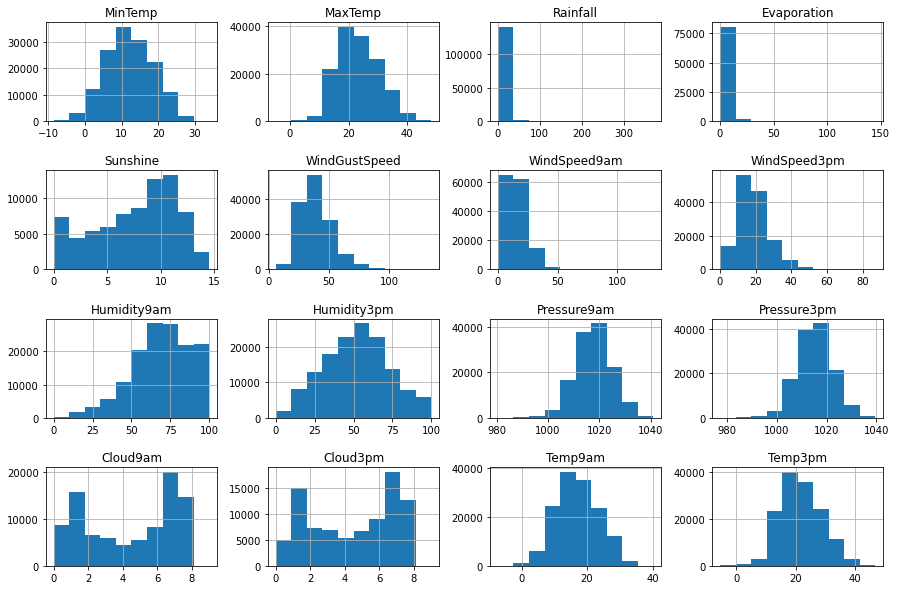

In [6]:
#Call `hist` method to plot histograms of each of the numeric features
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

#### Initial Observations from the dataset:
1. 23 Columns of data including 19 numerical columns and 4 categorical columns. 
2. The target feature has been identified as RainTomorrow
3. Some of the numerical data look like they are normally distributed
4. Some columns to further examine based on odd-shaped histograms are Rainfall, Evaporation, all 3 of the Windspeed columns, and both of the Cloud columns.
5. Some columns are missing a large amount of data: Evaporation, Sunshine, Cloud9am, Cloud3pm. These may need to be removed prior to modeling. 

Initial Questions:
1. Can we turn RainToday and RainTomorrow into a new column where 'Yes'==1 and 'No'==0 to make it easier for analysis?
2. Are there redundant columns (ie. Pressure9am vs Pressure3pm)? Can we create a new column where we find the difference in Pressure between these two times?

## Exploring the Target Feature
The feature RainTomorrow is the feature we want to predict. 
RainTomorrow will be examined, as well as RainToday to see how these differ from eachother.

In [7]:
#Examination of the Target Feature 'RainTomorrow'
#Target Feature is RainTomorrow. RainToday and RainTomorrow are both categorical with either 'Yes' or 'No'

df.groupby(['RainToday'])[['RainToday']].count()

,RainToday
RainToday,
No,110319
Yes,31880


In [8]:
df.groupby(['RainTomorrow'])[['RainTomorrow']].count()

,RainTomorrow
RainTomorrow,
No,110316
Yes,31877


Text(0, 0.5, 'Count')

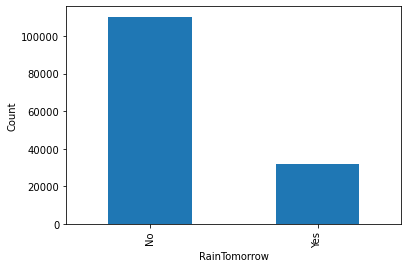

In [9]:
#Bar plot of RainTomorrow counts
df.groupby(['RainTomorrow'])['RainTomorrow'].count().plot(kind='bar').set_ylabel('Count')

In [10]:
# count missing values in Target Feature
df['RainTomorrow'].isnull().sum()

3267

In [11]:
df = df.dropna(axis=0, subset=['RainTomorrow'])

In [12]:
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
# We will change 'Yes' to 1, and 'No' to 0 for easier analysis later on.

df= df.replace({'RainTomorrow':'Yes'}, 1)
df= df.replace({'RainTomorrow':'No'}, 0)

print(df.RainTomorrow.unique())
print(df.RainTomorrow.dtypes)


[0 1]
int64


In [14]:
# Now we will do the same to the RainToday column.

df= df.replace({'RainToday':'Yes'}, 1)
df= df.replace({'RainToday':'No'}, 0)
#df.replace({'RainTomorrow': 'No'}, 0)
#df.loc[df.RainTomorrow == 'No', 'RainTomorrow'] = 0
print(df.RainToday.unique())
print(df.RainToday.dtypes)

[ 0.  1. nan]
float64


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

#### Initial observations about Target Feature: RainTomorrow
1. There were 3267 null values in this column, and these entire rows were removed.
2. It is not clear what the relationship is between RainToday and RainTomorrow columns. A correlation analysis can be done between these two features.
3. RainTomorrow and RainToday were both converted into a numerical values by changing Yes to 1 and No to 0. 

## Explore the categorical features 
Location, WindGustDir, WindDir9am, WinDir3pm are categorical features

In [16]:
# Identify the unique locations
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [17]:
# How many unique locations are there?
len(df['Location'].unique())

49

In [18]:
# Are there any records with null values for Location?
df['Location'].isnull().sum()

0

<AxesSubplot:title={'center':'Number of Records for each Location'}, xlabel='Location', ylabel='Count'>

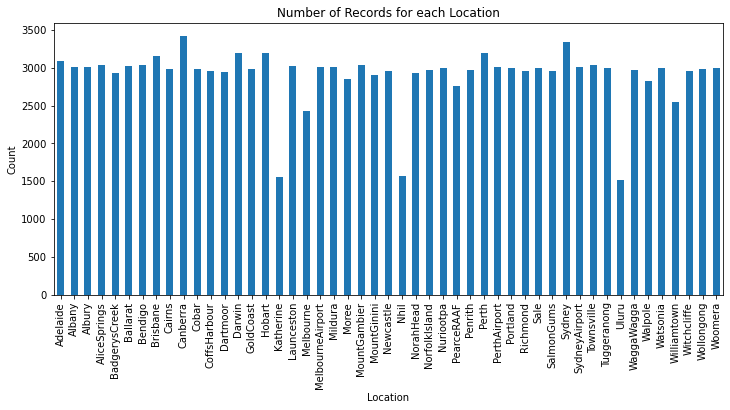

In [19]:
# How many records or rows are there for each location? 
df.groupby(['Location'])['Location'].count()
df.groupby(['Location'])['Location'].count().plot(kind='bar', figsize=[12,5], ylabel='Count', title='Number of Records for each Location')
# Most locations have a similar number of records ~3000 while 3 locatons have about half that amount.

<AxesSubplot:title={'center':'Ratio of Rainy Days Across Locations'}, xlabel='Location', ylabel='Ratio of Days with Rain per Location'>

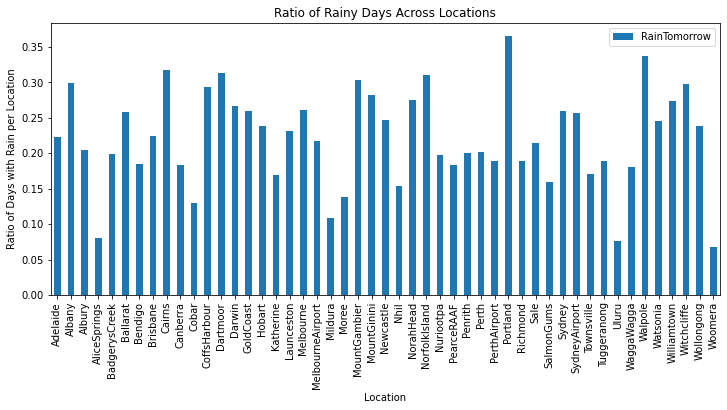

In [20]:
# Ratio of RainTomorrow_Yes (True/False) averaged for each location
df.groupby(['Location' ])[['RainTomorrow']].mean()
df.groupby(['Location' ])[['RainTomorrow']].mean().plot(kind='bar', figsize=(12, 5),ylabel='Ratio of Days with Rain per Location', title='Ratio of Rainy Days Across Locations')
# Rain varies between different locations

In [21]:
df.groupby(['Location' ])[['RainTomorrow']].mean()

,RainTomorrow
Location,
Adelaide,0.222654
Albany,0.299072
Albury,0.205247
AliceSprings,0.080501
BadgerysCreek,0.199112
Ballarat,0.257926
Bendigo,0.185234
Brisbane,0.224296
Cairns,0.317938


<AxesSubplot:ylabel='Frequency'>

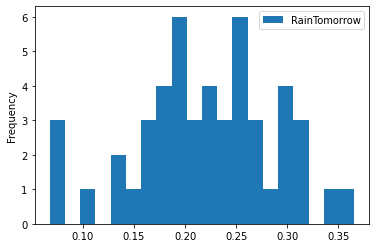

In [22]:
# Distribution of mean RainTomorrow by Location
df.groupby(['Location' ])[['RainTomorrow']].mean().plot(kind='hist', bins=20)

#### Initial Observations about Location
1. 3 out of 49 Unique Locations have half as many entries as the other Locations.
2. This preliminary comparison of ratio of days with RainTomorrow grouped by Location suggests that Location will be an important feature in this model.
3. There are no null values in the Location column.

### Other categorical features (wind gust direction, WindDir9am, WindDir3pm)
what is the difference between these 3 categories? Does 9am vs 3pm make a difference on RainTomorrow?

In [23]:
print(df['WindGustDir'].unique())
len(df['WindGustDir'].unique())

['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 nan 'E' 'SSW']


17

<AxesSubplot:title={'center':'Ratio of Days with Rain by Wind Gust Direction'}, xlabel='WindGustDir', ylabel='Ratio of Rainy Days'>

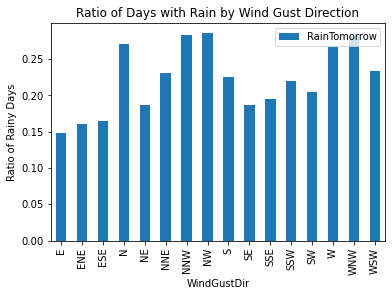

In [24]:
# Ratio of RainTomorrow averaged for each wind direction
df.groupby(['WindGustDir'])[['RainTomorrow']].mean()
df.groupby(['WindGustDir'])[['RainTomorrow']].mean().plot(kind='bar', figsize=(6,4), 
               title='Ratio of Days with Rain by Wind Gust Direction', ylabel='Ratio of Rainy Days')

#### Hypothesis Test 1:
Null Hypothesis: There is no association between 'WindGustDir' and RainTomorrow.  
Alternative Hypothesis: There is an association between 'WindGustDir' and RainTomorrow.

In [25]:
# Chi Square test to see if there is a statiscally significant difference in RainTomorrow between the WindGustDir
#Make a contingency table:
contigency= pd.crosstab(df['WindGustDir'], df['RainTomorrow'])
contigency

RainTomorrow,0,1
WindGustDir,,
E,7721,1350
ENE,6704,1288
ESE,6105,1200
N,6581,2452
NE,5741,1319
NNE,4952,1481
NNW,4698,1863
NW,5719,2284
S,6932,2017


<AxesSubplot:xlabel='RainTomorrow', ylabel='WindGustDir'>

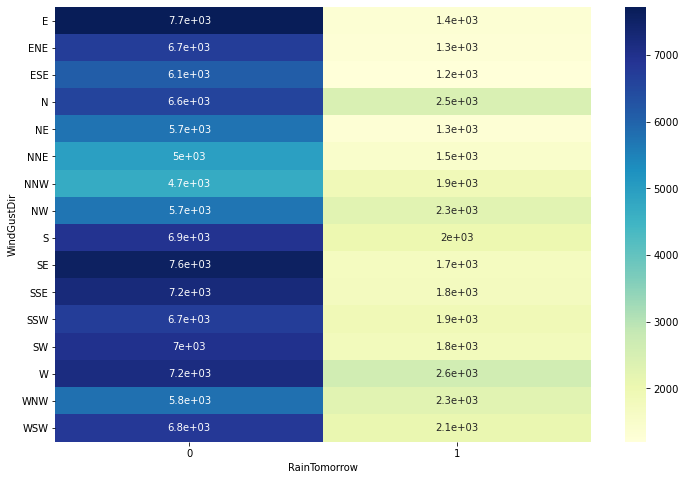

In [26]:
#Make a heatmap to visualize the contingency
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [27]:
# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contigency)
print('The chi square statistic is: ', c)
print('The p-value is: ', p)

The chi square statistic is:  1519.9012419828084
The p-value is:  0.0


#### P value is 0.  We reject the null hypothesis. 'WindGustDir' is associated with 'RainTomorrow'

In [28]:
# Chi square test for other Wind Direction columns: WindDir9am
contigency= pd.crosstab(df['WindDir9am'], df['RainTomorrow'])
# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contigency)
print('The chi square statistic is: ', c)
print('The p-value is: ', p)

The chi square statistic is:  2214.8468820751004
The p-value is:  0.0


In [29]:
# Chi square test for other Wind Direction columns: WindDir3pm
contigency= pd.crosstab(df['WindDir3pm'], df['RainTomorrow'])
# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contigency)
print('The chi square statistic is: ', c)
print('The p-value is: ', p)

The chi square statistic is:  1281.2667035163702
The p-value is:  5.645749267196633e-264


#### Initial Observations of Wind Direction data
1. The values are different for WindGustDir and also for the 9am and 3pm columns.
2. Wind direction is categorical data, and chi square test shows this is associated with RainTomorrow.
3. All 3 'Wind Direction' columns are statistically significant. Since it may be redundant to have all 3 columns, the 9am and 3pm columns will be removed, leaving the "WindGustDir" column since it is the direction of the strongest wind gust measured for that day. 


## Numerical Features

In [31]:
#look at distribution and relationship of some numerical features to RainTomorrow
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,7.6,12.0,16.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,2.6,4.8,7.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,4.9,8.5,10.6,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,13.0,19.0,24.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,57.0,70.0,83.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,37.0,52.0,66.0,100.0


In [32]:
# Because Sunshine column is missing half of its values, we are evaluating the 
# portion of the dataset that has missing data to see if we notice any patterns.
df[df['Sunshine'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67816 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           67816 non-null  object 
 1   Location       67816 non-null  object 
 2   MinTemp        67276 non-null  float64
 3   MaxTemp        67541 non-null  float64
 4   Rainfall       66805 non-null  float64
 5   Evaporation    10932 non-null  float64
 6   Sunshine       0 non-null      float64
 7   WindGustDir    62863 non-null  object 
 8   WindGustSpeed  62900 non-null  float64
 9   WindDir9am     60480 non-null  object 
 10  WindDir3pm     64718 non-null  object 
 11  WindSpeed9am   66639 non-null  float64
 12  WindSpeed3pm   65577 non-null  float64
 13  Humidity9am    66442 non-null  float64
 14  Humidity3pm    64781 non-null  float64
 15  Pressure9am    53935 non-null  float64
 16  Pressure3pm    53973 non-null  float64
 17  Cloud9am       22057 non-null  float64
 18  Cloud

In [33]:
# examining the date column, finding the datatype:
df['Date'].head()

0    2008-12-01
1    2008-12-02
2    2008-12-03
3    2008-12-04
4    2008-12-05
Name: Date, dtype: object

In [34]:
# create a month and year column and extract the month and year from the datetime object.
# The date column can be dropped later.
pd.to_datetime(df['Date']).dt.month

df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.year
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0,12,2008


In [35]:
# Examining the 'Sunshine' for one location by 'Month'
df[df['Location']=='Sydney'][['Sunshine', 'Month']]

,Sunshine,Month
30176,0.0,2
30177,2.7,2
30178,0.1,2
30179,0.0,2
30180,0.0,2
...,...,...
33515,7.8,6
33516,9.2,6
33517,2.7,6
33518,9.3,6


Text(0, 0.5, 'Month')

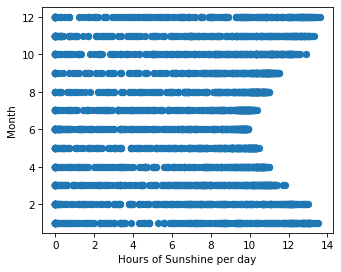

In [64]:
x = df[df['Location']=='Sydney'][['Sunshine']]
y = df[df['Location']=='Sydney'][['Month']]
plt.scatter(x,y)
plt.xlabel('Hours of Sunshine per day')
plt.ylabel('Month')

,mean,std
RainTomorrow,,
0,11.897675,6.398699
1,13.186890,6.317971


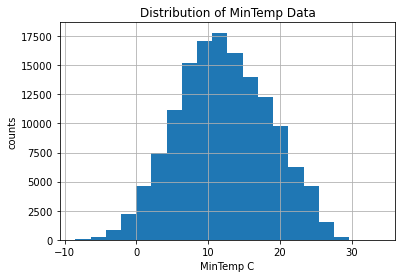

In [37]:
#distribution of MinTemp Data
ax = (df['MinTemp']).hist(bins=20) 
ax.set_ylabel('counts')
ax.set_xlabel('MinTemp C')
ax.set_title('Distribution of MinTemp Data')

df.groupby(['RainTomorrow'])['MinTemp'].describe().loc[:,['mean','std']]
# When RainTomorrow = 1 or Yes, the temperature is about 1.2 Degrees C higher.

,mean,std
RainTomorrow,,
0,23.836247,7.059825
1,21.119100,6.911485


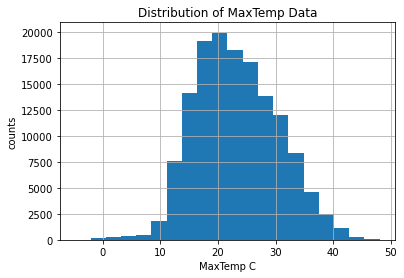

In [38]:
#distribution of MaxTemp Data
ax = (df['MaxTemp']).hist(bins=20) 
ax.set_ylabel('counts')
ax.set_xlabel('MaxTemp C')
ax.set_title('Distribution of MaxTemp Data')

df.groupby(['RainTomorrow'])['MaxTemp'].describe().loc[:,['mean','std']]
# When RainTomorrow = 1 or Yes, the temperature is about 1.2 Degrees C higher.

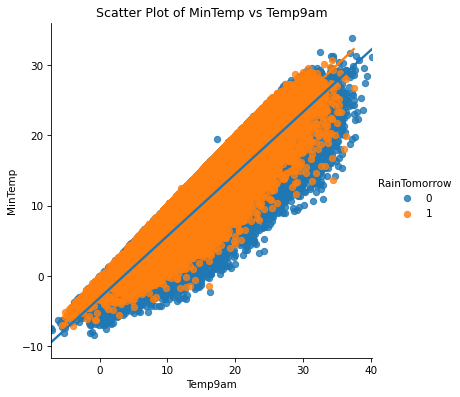

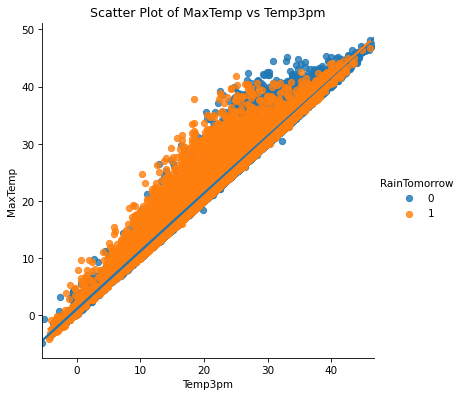

In [39]:
# Relationship between Min and Max Temp, Temp 9am and Temp 3pm.
plt.rcParams.update({'figure.figsize':(5,4), 'figure.dpi':75})
sns.lmplot(x='Temp9am', y='MinTemp', data=df, hue='RainTomorrow')
plt.title("Scatter Plot of MinTemp vs Temp9am");


plt.rcParams.update({'figure.figsize':(5,4), 'figure.dpi':75})
sns.lmplot(x='Temp3pm', y='MaxTemp', data=df, hue='RainTomorrow')
plt.title("Scatter Plot of MaxTemp vs Temp3pm");

,mean,std
RainTomorrow,,
0,38.288391,12.406522
1,45.946764,15.717954


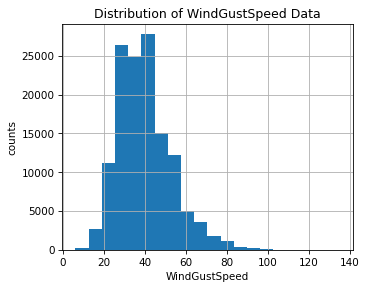

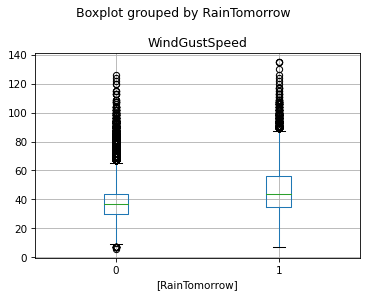

In [40]:
# distribution of WindGustSpeed
ax = (df['WindGustSpeed']).hist(bins=20) 
ax.set_ylabel('counts')
ax.set_xlabel('WindGustSpeed')
ax.set_title('Distribution of WindGustSpeed Data')

df.boxplot(column=['WindGustSpeed'],by = ['RainTomorrow'])
plt.tight_layout()

df.groupby(['RainTomorrow'])['WindGustSpeed'].describe().loc[:,['mean','std']]


,mean,std
RainTomorrow,,
0,1018.595599,6.760700
1,1014.400000,7.304373


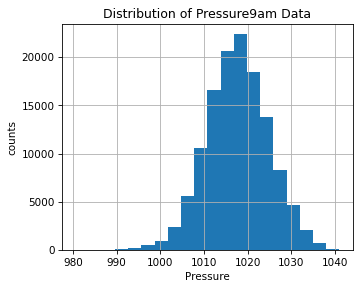

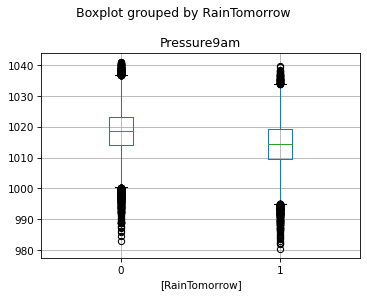

In [41]:
#distribution of Pressure9am data
ax = (df['Pressure9am']).hist(bins=20) 
ax.set_ylabel('counts')
ax.set_xlabel('Pressure')
ax.set_title('Distribution of Pressure9am Data')

df.boxplot(column=['Pressure9am'],by = ['RainTomorrow'])
plt.tight_layout()

df.groupby( ['RainTomorrow'])['Pressure9am'].describe().loc[:,['mean','std']]

,mean,std
RainTomorrow,,
0,1016.113587,6.710292
1,1012.300820,7.331664


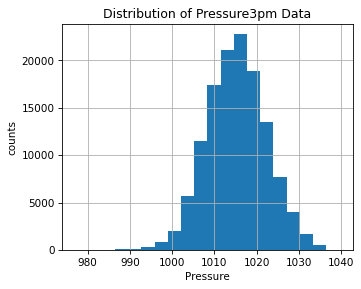

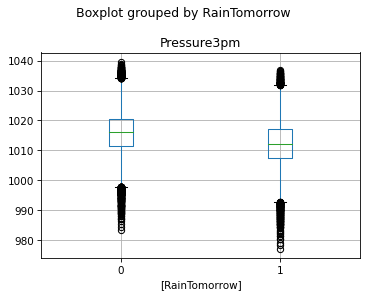

In [42]:
#distribution of Pressure3pm data
ax = (df['Pressure3pm']).hist(bins=20) 
ax.set_ylabel('counts')
ax.set_xlabel('Pressure')
ax.set_title('Distribution of Pressure3pm Data')

df.boxplot(column=['Pressure3pm'],by = ['RainTomorrow'])
plt.tight_layout()

df.groupby( ['RainTomorrow'])['Pressure3pm'].describe().loc[:,['mean','std']]

In [43]:
# Add a column to show the difference in Pressure (Pressure3pm - Pressure9am)
df['Pressure_Diff'] = df['Pressure3pm'] - df['Pressure9am']
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year,Pressure_Diff
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,0.0,0,12,2008,-0.6
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,0.0,0,12,2008,-2.8
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,0.0,0,12,2008,1.1
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,0.0,0,12,2008,-4.8
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,0.0,0,12,2008,-4.8


,mean,std
RainTomorrow,,
0,-2.482602,1.837420
1,-2.103548,2.338037


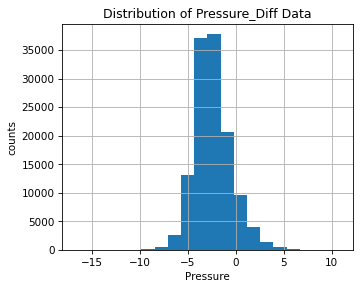

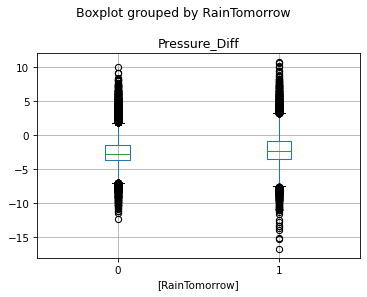

In [44]:
#distribution of Pressure_Diff data- 
ax = (df['Pressure_Diff']).hist(bins=20) 
ax.set_ylabel('counts')
ax.set_xlabel('Pressure')
ax.set_title('Distribution of Pressure_Diff Data')

df.boxplot(column=['Pressure_Diff'],by = ['RainTomorrow'])
plt.tight_layout()

df.groupby( ['RainTomorrow'])['Pressure_Diff'].describe().loc[:,['mean','std']]



#### Hypothesis Test 2:
Null Hypothesis: The Pressure_Diff values are the same for the two RainTomorrow groups.  
Alternative Hypothesis: The Pressure_Diff values are different between the two RainTomorrow groups (0 and 1). 

In [45]:
df_A = df.dropna(axis=0, subset=['Pressure_Diff'])
A = df_A[df_A['RainTomorrow']==0]['Pressure_Diff']
B = df_A[df_A['RainTomorrow']==1]['Pressure_Diff']
scipy.stats.ttest_ind(A, B)

Ttest_indResult(statistic=-28.84984965260336, pvalue=1.9641096571749098e-182)

#### P value is less than 0.05. We reject the null hypothesis. 

,mean,std
RainTomorrow,,
0,66.217573,19.020703
1,77.983314,16.108377


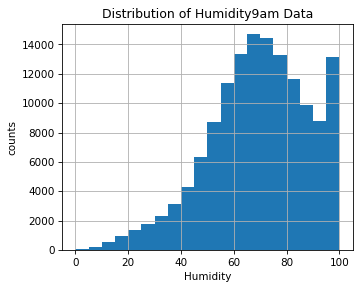

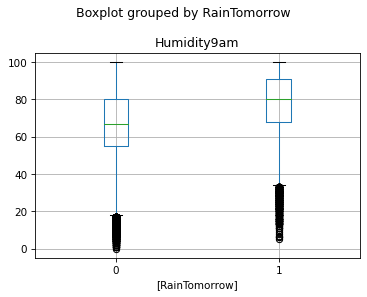

In [46]:
#distribution of Humidity9am data
ax = (df['Humidity9am']).hist(bins=20) 
ax.set_ylabel('counts')
ax.set_xlabel('Humidity')
ax.set_title('Distribution of Humidity9am Data')

df.boxplot(column=['Humidity9am'],by = ['RainTomorrow'])
plt.tight_layout()

df.groupby( ['RainTomorrow'])['Humidity9am'].describe().loc[:,['mean','std']]

,mean,std
RainTomorrow,,
0,46.510625,18.489476
1,68.800019,19.037409


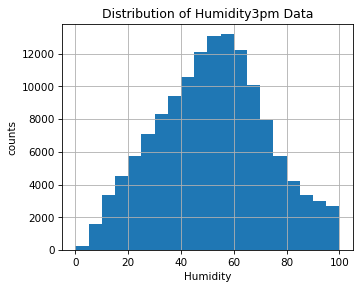

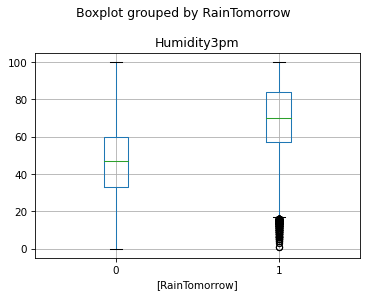

In [47]:
#distribution of Humidity3pm data
ax = (df['Humidity3pm']).hist(bins=20) 
ax.set_ylabel('counts')
ax.set_xlabel('Humidity')
ax.set_title('Distribution of Humidity3pm Data')

df.boxplot(column=['Humidity3pm'],by = ['RainTomorrow'])
plt.tight_layout()

df.groupby( ['RainTomorrow'])['Humidity3pm'].describe().loc[:,['mean','std']]

#### Hypothesis Test 3:
Null Hypothesis: The Humidity3pm values are the same for the two RainTomorrow groups.  
Alternative Hypothesis: The Humidity3pm values are different between the two RainTomorrow groups (0 and 1). 

In [48]:
df_A = df.dropna(axis=0, subset=['Humidity3pm'])
A = df_A[df_A['RainTomorrow']==0]['Humidity3pm']
B = df_A[df_A['RainTomorrow']==1]['Humidity3pm']
scipy.stats.ttest_ind(A, B)

Ttest_indResult(statistic=-185.5848864315162, pvalue=0.0)

#### The p value is 0. We reject the null hypothesis. 

In [49]:
# Add a column to show the difference in Humidity (Humidity3pm - Humidity9am)
df['Humidity_Diff'] = df['Humidity3pm'] - df['Humidity9am']
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year,Pressure_Diff,Humidity_Diff
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,8.0,NaN,16.9,21.8,0.0,0,12,2008,-0.6,-49.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,NaN,NaN,17.2,24.3,0.0,0,12,2008,-2.8,-19.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,NaN,2.0,21.0,23.2,0.0,0,12,2008,1.1,-8.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,NaN,NaN,18.1,26.5,0.0,0,12,2008,-4.8,-29.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,7.0,8.0,17.8,29.7,0.0,0,12,2008,-4.8,-49.0


,mean,std
RainTomorrow,,
0,-19.713761,15.431266
1,-9.188344,16.709306


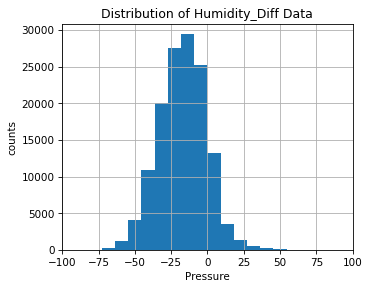

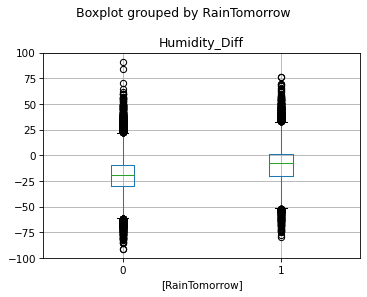

In [50]:
#distribution of Humidity_Diff data
ax = (df['Humidity_Diff']).hist(bins=20) 
ax.set_ylabel('counts')
ax.set_xlabel('Pressure')
ax.set_title('Distribution of Humidity_Diff Data')

df.boxplot(column=['Humidity_Diff'],by = ['RainTomorrow'])
plt.tight_layout()

df.groupby( ['RainTomorrow'])['Humidity_Diff'].describe().loc[:,['mean','std']]

,mean,std
RainTomorrow,,
0,3.932282,2.877299
1,6.099990,2.216997


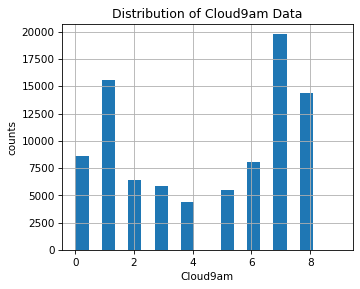

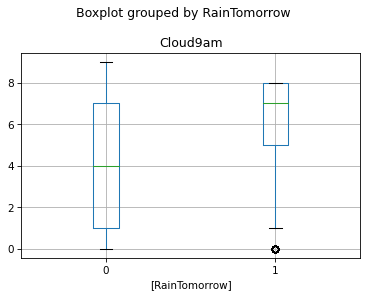

In [51]:
#distribution of Cloud9am data
ax = (df['Cloud9am']).hist(bins=20) 
ax.set_ylabel('counts')
ax.set_xlabel('Cloud9am')
ax.set_title('Distribution of Cloud9am Data')

df.boxplot(column=['Cloud9am'],by = ['RainTomorrow'])
plt.tight_layout()

df.groupby( ['RainTomorrow'])['Cloud9am'].describe().loc[:,['mean','std']]

,mean,std
RainTomorrow,,
0,3.921896,2.667284
1,6.360065,1.947514


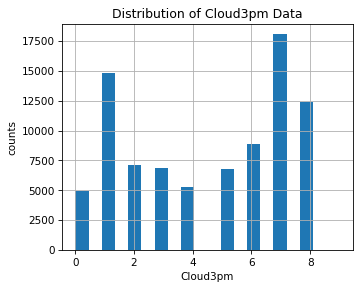

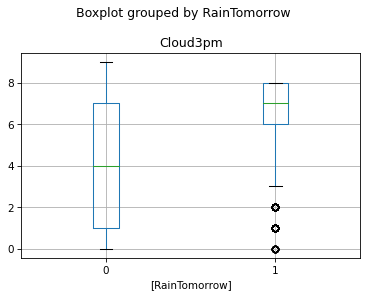

In [52]:
#distribution of Cloud3pm data
ax = (df['Cloud3pm']).hist(bins=20) 
ax.set_ylabel('counts')
ax.set_xlabel('Cloud3pm')
ax.set_title('Distribution of Cloud3pm Data')

df.boxplot(column=['Cloud3pm'],by = ['RainTomorrow'])
plt.tight_layout()

df.groupby( ['RainTomorrow'])['Cloud3pm'].describe().loc[:,['mean','std']]

#### Hypothesis Test 4: 
Null Hypothesis: The Cloud3pm values are the same for the two RainTomorrow groups.  
Alternative Hypothesis: The Cloud3pm values are different between the two RainTomorrow groups (0 and 1). 

In [53]:
# t-test between Cloud3pm
df_A = df.dropna(axis=0, subset=['Cloud3pm'])
A = df_A[df_A['RainTomorrow']==0]['Cloud3pm']
B = df_A[df_A['RainTomorrow']==1]['Cloud3pm']
scipy.stats.ttest_ind(A, B)

Ttest_indResult(statistic=-120.53126321396545, pvalue=0.0)

#### The p-value is 0. We reject the null hypothesis.

,count,mean,std,min,25%,50%,75%,max
RainTomorrow,,,,,,,,
0,109586.0,1.270290,5.332200,0.0,0.0,0.0,0.2,240.0
1,31201.0,6.142104,14.318292,0.0,0.0,0.8,6.2,371.0


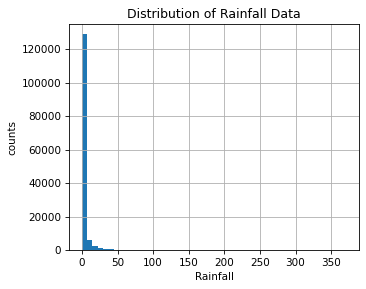

In [54]:
#distribution of rainfall data
ax = (df['Rainfall']).hist(bins=50) 
ax.set_ylabel('counts')
ax.set_xlabel('Rainfall')
ax.set_title('Distribution of Rainfall Data')


df.groupby( ['RainTomorrow'])['Rainfall'].describe()

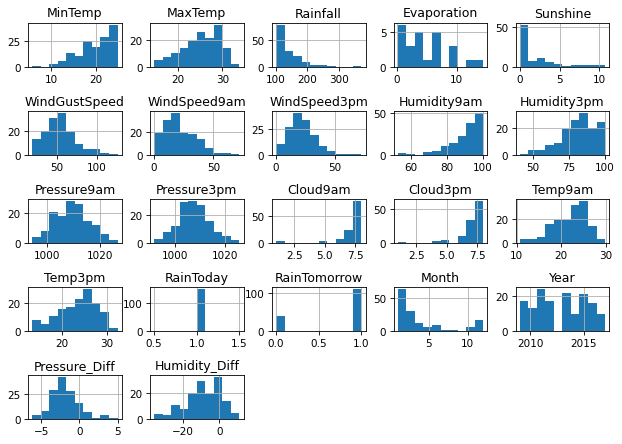

In [55]:
# Should get all values that are above 100 as these could be errors (based on the histogram)
len(df[df['Rainfall']>100])
df[df['Rainfall']>100].hist(figsize=(10,7))
plt.subplots_adjust(hspace=1);

In [56]:
# there are 151 entries with Rainfall values above 100, this does not seem like it is an error. These are real rainfall measurments.
# try setting the threshhold higher to 200)
len(df[df['Rainfall']>200])


14

In [57]:
# There are 14 records with Rainfall values above 200

In [58]:
# It doesn't seem like these are errors... just very few records with large amount of rainfall.
# Now we will examine the Rainfall data that are less than or equal to 25 
print(len(df[df['Rainfall']<=25]))
print(len(df))
# Calculate how much of the data fall under a rainfall value of 25
print(round(139329/145460, 2))

137968
142193
0.96


#### Initial Observations about Numerical data
1. Some features could be related to RainTomorrow such as Humidity, and Cloud3pm, based on the results of a t-test.
2. Cloud3pm and Cloud9am are not normally distributed, and approximately half the records are null for the Cloud columns.
3. Rainfall data is very skewed to the left. ~96% of the data fall under a Rainfall value of 25, while the remaining ~4% of the data are spread out to a max value of 371.


### Drop columns that are unnecessary: Date, Humidity9am, Pressure9am, Cloud9am, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm

In [59]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Month', 'Year',
       'Pressure_Diff', 'Humidity_Diff'],
      dtype='object')

In [60]:
df = df.drop(['Date','Humidity9am', 'Pressure9am', 'Cloud9am', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Temp9am',
       'Temp3pm' ], axis = 1)
df.head(3)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Humidity3pm,Pressure3pm,Cloud3pm,RainToday,RainTomorrow,Month,Year,Pressure_Diff,Humidity_Diff
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,22.0,1007.1,NaN,0.0,0,12,2008,-0.6,-49.0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,25.0,1007.8,NaN,0.0,0,12,2008,-2.8,-19.0
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,30.0,1008.7,2.0,0.0,0,12,2008,1.1,-8.0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   Humidity3pm    138583 non-null  float64
 9   Pressure3pm    128212 non-null  float64
 10  Cloud3pm       85099 non-null   float64
 11  RainToday      140787 non-null  float64
 12  RainTomorrow   142193 non-null  int64  
 13  Month          142193 non-null  int64  
 14  Year           142193 non-null  int64  
 15  Pressure_Diff  127989 non-null  float64
 16  Humidity_Diff  137907 non-null  float64
dtypes: float64(12), int64(3), obj

### EDA summary:
We see that categorical features Location and WindGustDir are associated with the RainTomorrow target feature as shown by the results of the statistical tests.
A Number of the numerical features also show a significant association with the RainTomorrow feature.
Dates have been converted to months and years in order to account for seasonal changes (months) and climate change (years). Redundant columns were dropped.
There are still issues to address before the data is ready for modeling. There are 3 columns where null values will be imputed (Sunshine, Evaporation, and Cloud3pm). 

### Output of the cleaned data:

In [63]:
df.to_csv(r'/Users/sangeetajayakar/Springboard_Course/Files_for_second_capstone/weatherAUS_files/rain_data_cleaned_4.csv')